   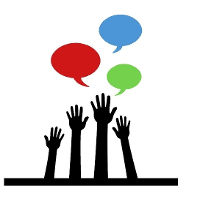


  #                            GRIP:THE SPARKS FOUNDATION

# Task 2:Exploring Supervised Machine learning

In this task I have used linear regresion to predict the expected score of a student based on the number of hours he studies.
Data source: http://bit.ly/w-data 
Question:What will be predicted score if a student study for 9.25 hrs in a day?


# Importing the required Libraries

In [1]:

import pandas as pd
import numpy as np #library for data analysis
import matplotlib.pyplot as plt #library for data visualisations
%matplotlib inline

Importing data set using given url

In [2]:
my_data = 'http://bit.ly/w-data'
data_frame = pd.read_csv(my_data)
print('Data Successfully imported')
#Print the first 5 records
data_frame.head()    

Data Successfully imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


<h10>Representation of Statistical data</h10>

In [3]:
data_frame.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
data_frame.shape

(25, 2)

In [5]:
data_frame.info()#checking datatypes of each column 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


Remarks:There is no null entries,so the given data is already clean.

<h3>Visualizing data</h3>

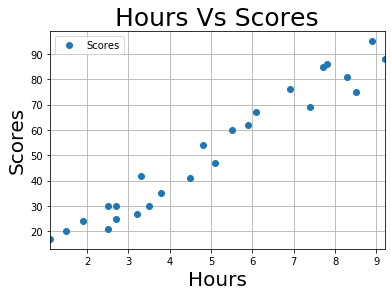

In [6]:
data_frame.plot(x='Hours',y='Scores',style='o')
plt.ylabel('Scores',fontsize=20)
plt.xlabel('Hours',fontsize=20)
plt.title('Hours Vs Scores',fontsize=25)
plt.grid()
plt.show()

<h10> Remarks:The more hours you study,The more scores you get </h10>

<h3>Preparing Data and splitting into train and test sets</h3>

In [7]:
#divide the data into input and output features
X = data_frame.iloc[:,:-1].values
y = data_frame.iloc[:,1].values

<h10>Using train_test_split method we split data into training and testing data sets</h10> 

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Training the Model

In [9]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
print('Model Trained Successfully')

Model Trained Successfully


# Plotting the Regression Line

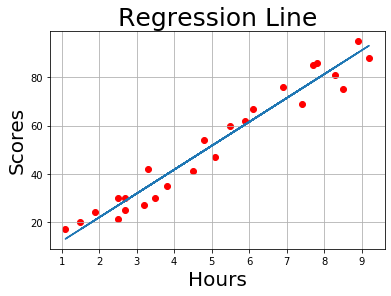

In [10]:
line = linear_model.coef_ * X + linear_model.intercept_
plt.scatter(X,y,color='red')
plt.plot(X,line)
plt.grid()
plt.ylabel('Scores',fontsize=20)
plt.xlabel('Hours',fontsize=20)
plt.title('Regression Line',fontsize=25)
plt.show()

# Visualizing Training and Testing Sets

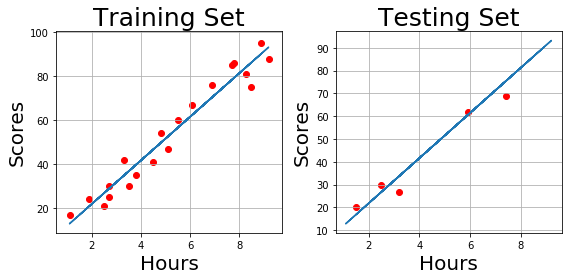

In [11]:
fig, axes = plt.subplots(1,2,figsize=(8,4))

#Training Set

axes[0].plot(X,line)
axes[0].scatter(X_train,y_train,color='red')
axes[0].grid()
axes[0].set_xlabel('Hours',fontsize=20)
axes[0].set_ylabel('Scores',fontsize=20)
axes[0].set_title('Training Set',fontsize=25)

#Testing Set

axes[1].plot(X,line)
axes[1].scatter(X_test,y_test,color='red')
axes[1].grid()
axes[1].set_xlabel('Hours',fontsize=20)
axes[1].set_ylabel('Scores',fontsize=20)
axes[1].set_title('Testing Set',fontsize=25)
fig.tight_layout()

<h3> Making Predictions </h3>

In [12]:
print(X_test) # Test data - In Hours
y_pred = linear_model.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [13]:
print(y_pred)  # Predicted scores 

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


Comparing actual Vs predicted scores

In [14]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) #Creating dataframe 
pred_df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Visualization for Actual Vs predicted values

[]

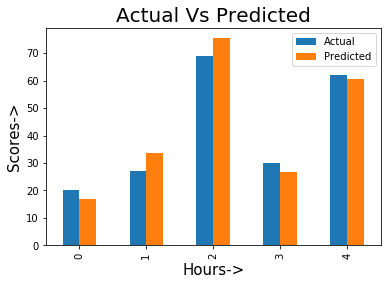

In [15]:
pred_df.plot(kind='bar')
plt.title('Actual Vs Predicted',fontsize=20)
plt.xlabel('Hours->',fontsize=15)
plt.ylabel('Scores->',fontsize=15)
plt.plot()

As per the above visualizations the actual and predicted value are closer to each other.

Predicted Score for student studying for 9.25 hours.

In [16]:
hours = 9.25
own_pred = linear_model.predict([[hours]])
print("No of Hours : %f" %hours)
print("Predicted Score : %f" %own_pred)

No of Hours : 9.250000
Predicted Score : 93.691732


<h3> Predicting Accuracy score for Linear Model </h3>

In [17]:
linear_model.score(X_train, y_train)  #Accuracy for training data

0.9515510725211553

In [18]:
linear_model.score(X_test, y_test)  #Accuracy for testing data

0.9454906892105356

<h3> Evaluating the model </h3>

In [19]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


In [20]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 4.6474476121003665


<h3>Conclusion</h3>
